In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nansat import Nansat
# access online SST data via OpenDAP
n1 = Nansat(
    'http://thredds.met.no/thredds/dodsC/sea_ice/SST-METNO-ARC-SST_L4-OBS-V2-V1/sst_arctic_aggregated',
    date='2012-06-01',
    bands=['analysed_sst']) 

# access online Cholorphyll data via OpenDAP
n2 = Nansat(
    'https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v2.0-8DAY',
    date='2012-06-01',
    bands=['chlor_a'])

# get transects from points given by longitutde, latitude
t1 = n1.get_transect([[24, 24], [71, 77]], ['analysed_sst'])
t2 = n2.get_transect([[24, 24], [71, 77]], ['chlor_a'])

# fetch values from transect
sst_lat = t1['lat']
sst_val = t1['analysed_sst']
chl_lat = t2['lat']
chl_val = t2['chlor_a']

# mask invalid SST values
sst_val[sst_val < 0] = np.nan

# plot using matplotlib
ax1 = plt.subplot()
ax1.plot(sst_lat, sst_val, '.-r')
ax1.set_xlabel('latitude')
ax1.set_ylabel('SST, K', color='r')
ax2 = ax1.twinx()
ax2.plot(chl_lat, chl_val, '.-g')
ax2.set_ylabel('CHL, mg m$^{-1}}$', color='g')
plt.savefig('chl_vs_sst.png', dpi=150, pad_inches=0, bbox_inches='tight')
plt.close()

/home/antonk/py/nansat/nansat/mappers/opendap.py:89: UserWarning: Time consuming loading time from OpenDAP...
  warnings.warn('Time consuming loading time from OpenDAP...')
/home/antonk/py/nansat/nansat/mappers/opendap.py:91: UserWarning: Loading time - OK!
  warnings.warn('Loading time - OK!')
/home/antonk/miniconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:689: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


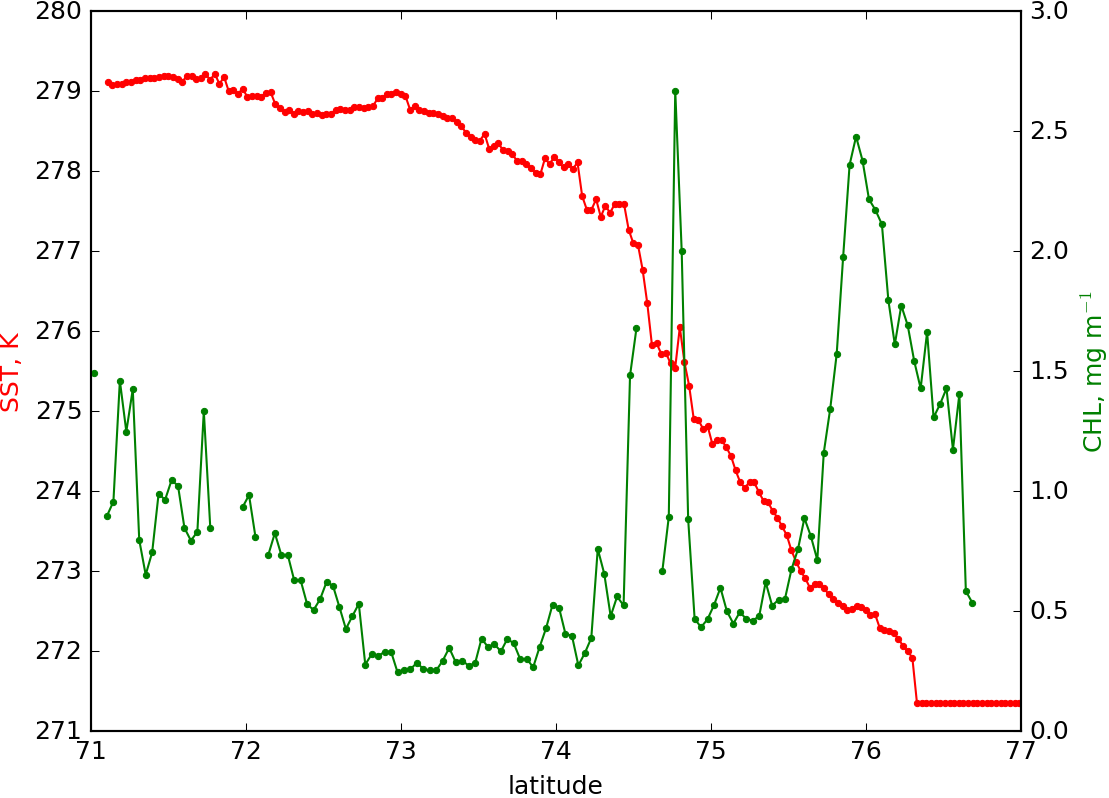

In [2]:
from IPython.core.display import Image
Image(filename='chl_vs_sst.png')